This notebook will work through a simple weather model as presented in lecture 3

* Gentle Introduction to Modeling with Matrices and Vectors: A Probabilistic Weather Model

Our references are:
* [Differential Equations and Dynamical Systems - Dr Steven L Brunton - YouTube Lectures](https://www.youtube.com/playlist?list=PLMrJAkhIeNNTYaOnVI3QpH7jgULnAmvPA)
* [Matplotlib version 3.8](https://matplotlib.org/)
* [Numpy version 1.26.0](https://numpy.org/)
* [Python version 3.12.2](https://www.python.org/)

Tutor:
* Anthropic's AI Claude

Transition Matrix A: 
 [[0.5  0.5  0.25]
 [0.25 0.   0.25]
 [0.25 0.5  0.5 ]]

Today's weather conditions x_today: 
 [[1]
 [0]
 [0]]

The probabilities of tomorrow's weather is given by matrix multiplication: 
 [[0.5 ]
 [0.25]
 [0.25]]

The probability of the weather each day for the next 10 days is broken out as:

Day 1
Probability of Rain, Cloudy, Nice: 
 [[0.5 ]
 [0.25]
 [0.25]]

Day 2
Probability of Rain, Cloudy, Nice: 
 [[0.4375]
 [0.1875]
 [0.375 ]]

Day 3
Probability of Rain, Cloudy, Nice: 
 [[0.40625 ]
 [0.203125]
 [0.390625]]

Day 4
Probability of Rain, Cloudy, Nice: 
 [[0.40234375]
 [0.19921875]
 [0.3984375 ]]

Day 5
Probability of Rain, Cloudy, Nice: 
 [[0.40039062]
 [0.20019531]
 [0.39941406]]

Day 6
Probability of Rain, Cloudy, Nice: 
 [[0.40014648]
 [0.19995117]
 [0.39990234]]

Day 7
Probability of Rain, Cloudy, Nice: 
 [[0.40002441]
 [0.20001221]
 [0.39996338]]

Day 8
Probability of Rain, Cloudy, Nice: 
 [[0.40000916]
 [0.19999695]
 [0.3999939 ]]

Day 9
Probability of Ra

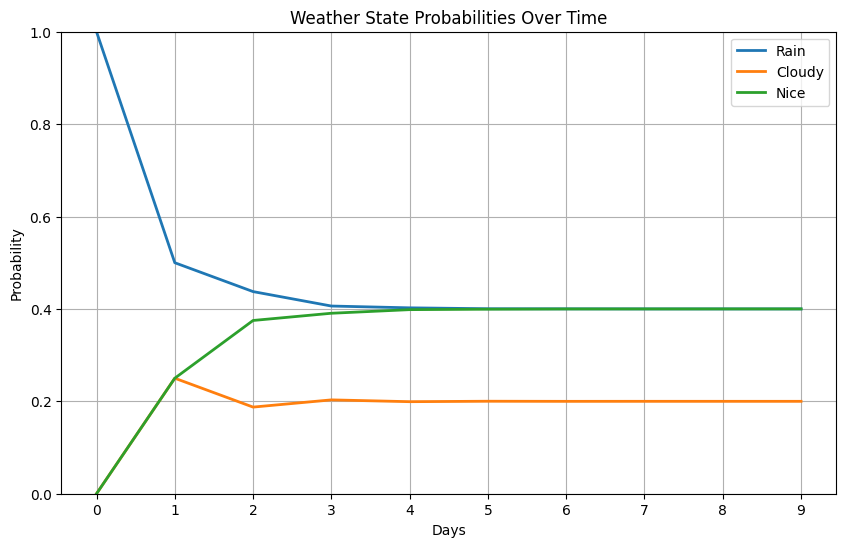

In [1]:
# Weather Prediction Model using Markov Chains
# This script simulates weather transitions using a Markov Chain model
# where states are: Rain (0), Cloudy (1), and Nice (2)

import numpy as np
from matplotlib import pyplot as plt

# Define the transition matrix
# Each row represents the probability of transitioning from one state to another
# Row 0: Probabilities of transitioning from Rain to [Rain, Cloudy, Nice]
# Row 1: Probabilities of transitioning from Cloudy to [Rain, Cloudy, Nice]
# Row 2: Probabilities of transitioning from Nice to [Rain, Cloudy, Nice]
A = np.array([
    [0.5, 0.5, 0.25],  # Transition probabilities from Rain
    [0.25, 0.0, 0.25], # Transition probabilities from Cloudy
    [0.25, 0.5, 0.5]   # Transition probabilities from Nice
])
print('Transition Matrix A: \n', A)

# Initialize the current weather state
# [1, 0, 0] represents 100% chance of Rain today (state 0)
x_today = np.array([[1], [0], [0]])
print('\nToday\'s weather conditions x_today: \n', x_today)

# Calculate tomorrow's weather probabilities using matrix multiplication
# A @ x_today multiplies the transition matrix by today's state
print('\nThe probabilities of tomorrow\'s weather is given by matrix multiplication: \n', A @ x_today)

# Simulate weather predictions for the next 10 days
print('\nThe probability of the weather each day for the next 10 days is broken out as:')
for k in range(10):
    # Calculate next day's weather using Markov transition
    x_tomorrow = A @ x_today
    # Update current state for next iteration
    x_today = x_tomorrow
    print('\nDay', k+1)  # Adjusted to start from Day 1 instead of Day 0
    print('Probability of Rain, Cloudy, Nice: \n', x_tomorrow)

# Create a matrix to store all weather probabilities over time for visualization
print('\nWeather probability matrix for visualization:')
mondo_weather_matrix = np.zeros((3, 10))
# Reset the initial condition
x_today = np.array([[1], [0], [0]])
# Store the initial state in the first column
mondo_weather_matrix[:, 0] = x_today[:, 0]

# Populate the matrix with weather probabilities for each day
for k in range(1, 10):  # Start from 1 since we already set day 0
    x_tomorrow = A @ x_today
    x_today = x_tomorrow
    mondo_weather_matrix[:, k] = x_tomorrow[:, 0]

# Visualize the weather probability trends
plt.figure(figsize=(10, 6))
plt.plot(mondo_weather_matrix.transpose(), linewidth=2)
plt.grid(True)
plt.title('Weather State Probabilities Over Time')
plt.xlabel('Days')
plt.ylabel('Probability')
plt.legend(['Rain', 'Cloudy', 'Nice'])
plt.xticks(range(10))
plt.ylim(0, 1)
plt.show()